## Resolução da 1º NAC do Semestre

**Rúbrica a serem atendidas:**

*   R1 - Nota 6
*   R2 - Nota 8

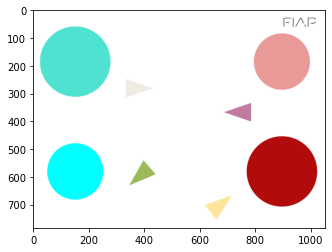

In [2]:
%matplotlib inline
# Importando a biblioteca OpenCV
import cv2 

#import a biblioteca Numpy
import numpy as np

from matplotlib import pyplot as plt

imagem = cv2.imread("circulo.png")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

**R1**

Use a imagem circulo.png para implementar um código que:
* Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado. (máx 3 pontos) 
* Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área; (máx 3 pontos) 

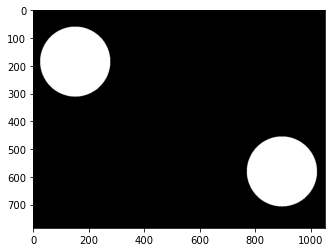

In [3]:
#Segmenta os 2 círculos maiores

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsvRed = np.array([0, 230, 165])  
image_upper_hsvRed = np.array([10, 255, 255])

image_lower_hsvBlue = np.array([75, 160, 220])  
image_upper_hsvBlue = np.array([95, 255, 230])

mask_hsvBoth = cv2.bitwise_or(cv2.inRange(img_hsv, image_lower_hsvRed, image_upper_hsvRed), cv2.inRange(img_hsv, image_lower_hsvBlue, image_upper_hsvBlue))



contours, _ = cv2.findContours(mask_hsvBoth, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

biggestCircles = cv2.cvtColor(mask_hsvBoth, cv2.COLOR_BGR2RGB)



   

plt.subplot(1, 1, 1)
plt.imshow( biggestCircles)


plt.show()

centro de massa na possição:  895 580 area 49557.0
centro de massa na possição:  151 185 area 49575.0


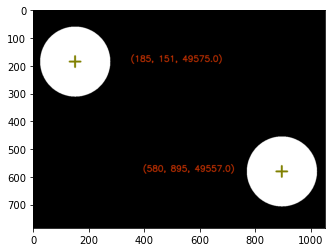

In [4]:
#Calcula área e o centro de massa

#Segmenta os 2 círculos maiores

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsvRed = np.array([0, 230, 165])  
image_upper_hsvRed = np.array([10, 255, 255])

image_lower_hsvBlue = np.array([75, 160, 220])  
image_upper_hsvBlue = np.array([95, 255, 230])

mask_hsvBoth = cv2.bitwise_or(cv2.inRange(img_hsv, image_lower_hsvRed, image_upper_hsvRed), cv2.inRange(img_hsv, image_lower_hsvBlue, image_upper_hsvBlue))



contours, _ = cv2.findContours(mask_hsvBoth, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

biggestCircles = cv2.cvtColor(mask_hsvBoth, cv2.COLOR_BGR2RGB)
contornos_img = biggestCircles.copy() 

for i in contours:
    
    area = cv2.contourArea(i)
    
    M = cv2.moments(i)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print("centro de massa na possição: ",cx, cy,"area", area)
    
    size = 20
    color = (128,128,0)
    cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
    cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = cy , cx, area
    if cx <200:
        origem = (cx+200,cy)
    else:
        origem = (cx-500,cy)

    cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
   

plt.subplot(1, 1, 1)
plt.imshow(contornos_img);

#plt.imshow( biggestCircles)


plt.show()

**R2**

* Traça uma reta entre os dois centros dos círculos; (máx 0,5 pontos) 
* Calcula o ângulo de inclinação da reta em relação ao plano horizontal, inclinação em graus. O resultado esperado é uma imagem com  uma reta entre centros e valor do ângulo exibido na tela; (máx 1,5 pontos)

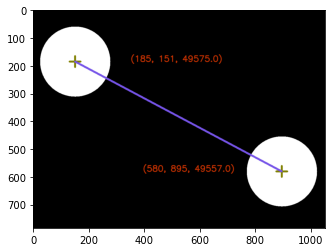

In [5]:
# Traça reta

color = (118, 84, 232)
cv2.line(contornos_img,(151 ,185), (895, 580),color,5)

plt.imshow(contornos_img);
plt.show()

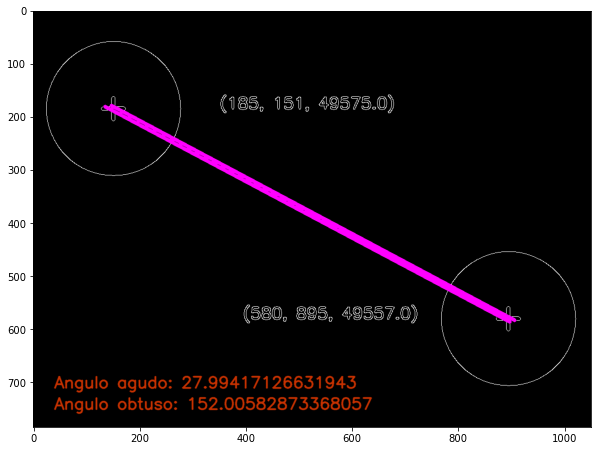

In [39]:
# Calcula angulo

import math

contornos_gray = cv2.cvtColor(contornos_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(contornos_gray, 50, 200)

lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 400, np.array([]), 10, 50)

hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)

angle = math.atan2(y2 - y1, x2 - x1);
angle = angle * 180 / np.pi;

font = cv2.FONT_HERSHEY_SIMPLEX
origemAG = (40,710)
origemAO = (40,750)
cv2.putText(hough_img_rgb, "Angulo agudo: " + str(angle), origemAG, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(hough_img_rgb, "Angulo obtuso: " + str(180 - angle), origemAO, font,1,(200,50,0),2,cv2.LINE_AA)

plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb);
plt.show()